In [1]:
clean_up = True
%run stdPackages.ipynb
d['data'] = os.path.join(d['data'], 'IO2018')

The file _gams_py_gdb2.gdx is still active and was not deleted.


# Simulations in general equilibrium

In [2]:
name = 'smallGR'
ws = gams.GamsWorkspace(working_directory=d['work']) # specify where you want to run the GAMS models from (here the repository referred to in d['work'])
with open(f"{d['data']}\\{name}_GE","rb") as file:
    GE = pickle.load(file)
GE.write();

In [26]:
def adjustLabels(x, labels_, keepLoop):
    return adj.rc_pd(adjMultiIndex.applyMult(x, labels_).droplevel('l1'), keepLoop).unstack(keepLoop.name)

### 1. Increase tax

Increase tax on energy by 10%:

*i. Set up target database:*

In [23]:
dbT = GpyDB(**{'name': 'TaxShock'})
dbT['tauS'] = adj.rc_pd(GE.get('tauS'), pd.Index(['energy'],name='n')) + 0.1
extractSol = {k:None for k in ('qS','qD','pD','p')}
labels = pd.Index(np.round(np.linspace(0,0.1,26),3), name = """$\Delta \\tau^S_e$""")

*ii. Solve:*

In [4]:
m_tax, cp_tax = GE.sneakySolve(dbT, ws = ws, loop_kwargs = {'extractSol': extractSol, 'n': 26}, **{'cns': 'CONOPT4'})

What levels are we keeping:

In [25]:
keepLoop = pd.Index([labels[0], labels[13], labels[25]], name = labels.name) # which labels in the loop are we plotting
labels_ = pd.MultiIndex.from_arrays([m_tax.out_db.get('l1'), labels]) 

Check some variable out:

In [31]:
qS_energy = adj.rc_pd(m_tax.out_db.get('sol_qS_shock').xs(('energy','energy'),level=['s','n']), GE.get('txE'))

Supply of energy:

<AxesSubplot:xlabel='t'>

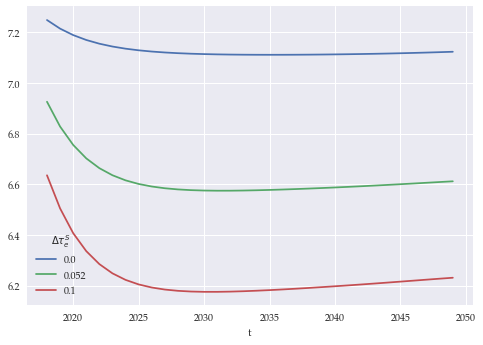

In [34]:
adjustLabels(qS_energy, labels_, keepLoop).plot()